<a href="https://colab.research.google.com/github/josemarcelovg/Gugulcollab2/blob/main/Informe_Tecnico_LISTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

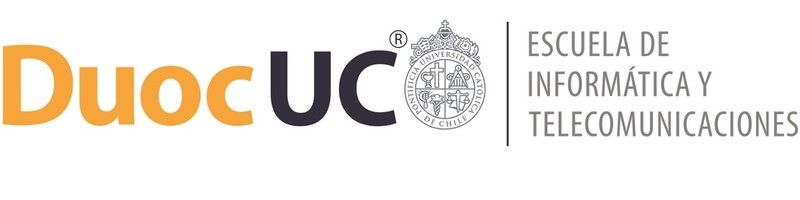

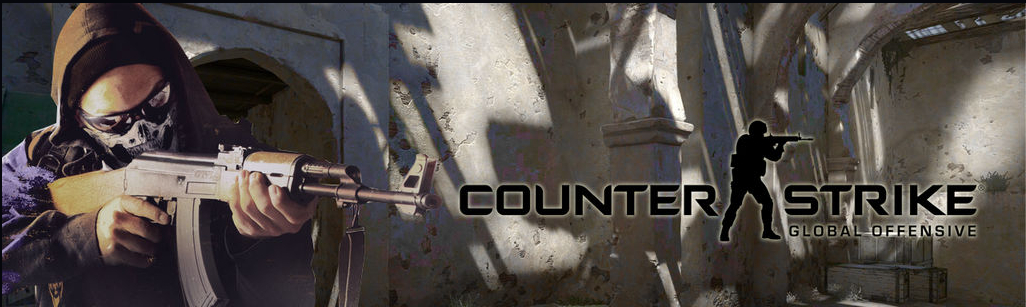

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Jose Vargas
* Nicolas Gonzalez
* Simon Jofre

Docente: Herman Zepeda

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# 🎯 Planteamiento de Hipótesis - Evaluación Machine Learning

## Contexto del negocio

Counter-Strike: Global Offensive (CS:GO) es un videojuego competitivo donde las decisiones tácticas y el rendimiento individual impactan directamente en el resultado de cada ronda. Uno de los elementos más relevantes en el desempeño es el **tipo de arma utilizada**, ya que cada clase tiene ventajas y desventajas según la situación.

#Los datos entregados corresponden a más de 79.000 registros de jugadores durante rondas del juego, incluyendo variables como kills, tiempo vivo, tipo de armas, valor del equipo, entre otras.

---

## Hipótesis para modelos de clasificación

**Hipótesis:**
> _"Es posible predecir si un jugador usará un rifle de asalto (Assault Rifle) durante una ronda, a partir de su desempeño (kills, headshots, asistencias, etc.)."_

- **Variable objetivo (target):**
  `PrimaryAssaultRifle` (0: No lo usó, 1: Sí lo usó)

- **Variables predictoras:**
  - `RoundKills`
  - `RoundHeadshots`
  - `RoundAssists`
  - `RoundFlankKills`
  - `TeamStartingEquipmentValue`

---

## Hipótesis para modelos de regresión

**Hipótesis:**
> _"El número de kills que un jugador realiza en una ronda puede predecirse según el tipo de arma que utiliza."_

- **Variable objetivo (target):**
  `RoundKills` (número entero)

- **Variables predictoras:**
  - `PrimaryAssaultRifle`
  - `PrimarySniperRifle`
  - `PrimarySMG`
  - `PrimaryPistol`
  - `PrimaryHeavy`

---

#

-# Se aplica la metodología **CRISP-DM** para entender y preparar los datos, entrenar modelos, evaluar resultados y generar conclusiones.
-# Se utilizan **técnicas de clasificación** (Random Forest, KNN, Regresión Logística) y **regresión supervisada** (Regresión Lineal, Random Forest Regressor).
-#Se trabaja con **métricas de evaluación** como `accuracy`, `R²`, `MAE` y `MSE`.
-#Se aplica **balanceo de clases** (SMOTE) y **ajuste de hiperparámetros** (GridSearchCV), que son técnicas vistas en el curso.#



## Fase 2: Data Understanding

Saving ET_demo_round_traces_2022.csv to ET_demo_round_traces_2022 (6).csv


/tmp/ipython-input-106-3205645897.py:11: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ET_demo_round_traces_2022.csv", sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

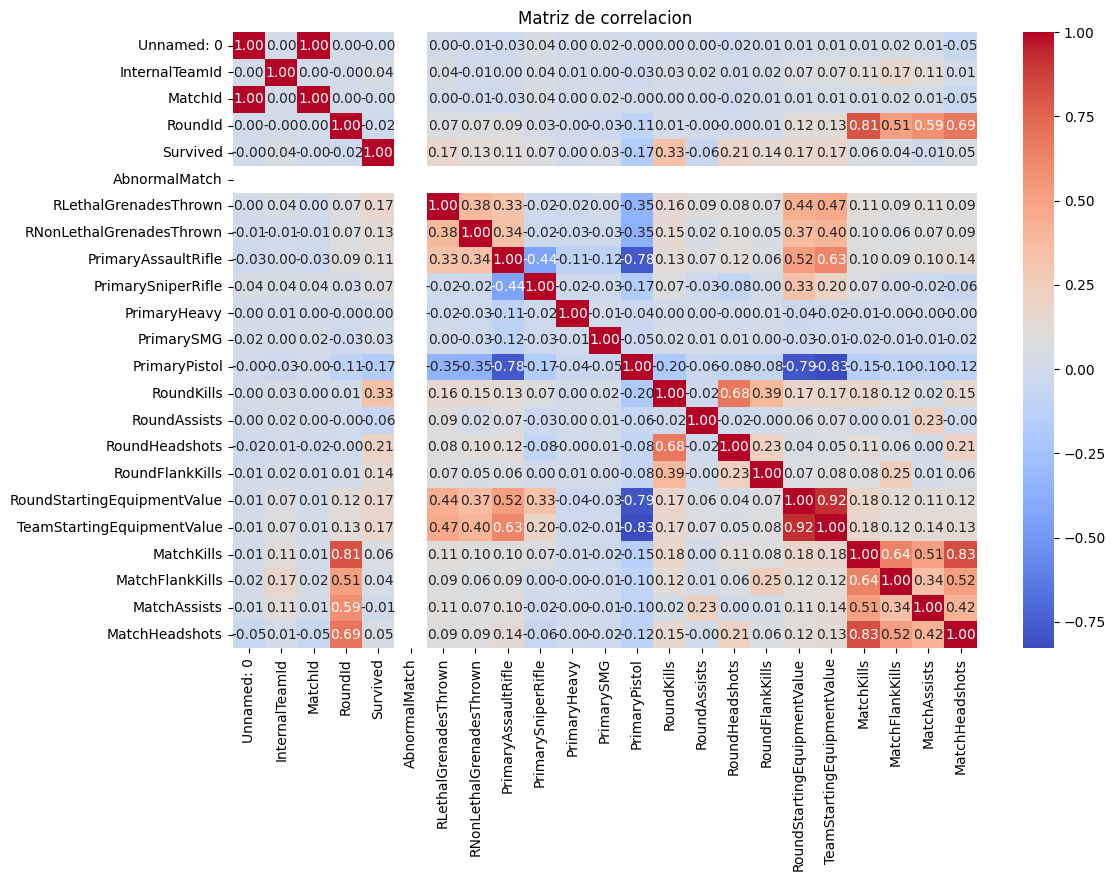

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Carga de datos
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("ET_demo_round_traces_2022.csv", sep=';')

# Vista general
df.head()
df.info()
df.describe()


# Matriz de correlacion
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlacion")
plt.show()

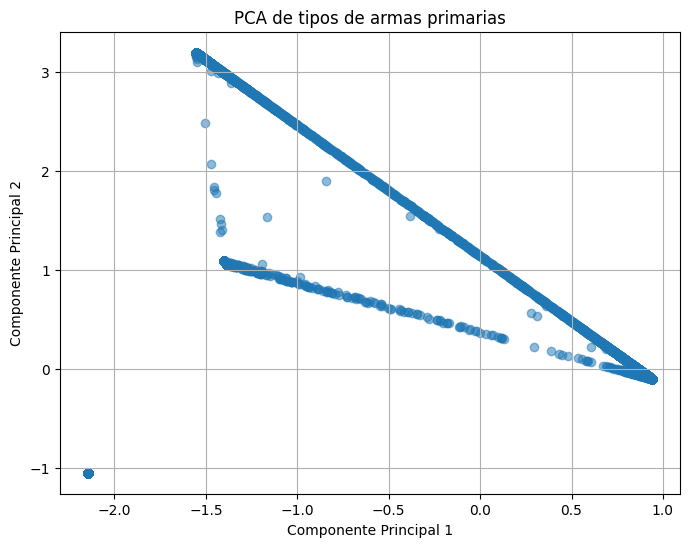

Varianza explicada: [0.36673493 0.22943639]


In [ ]:
# PCA REGRESION

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar y limpiar datos
columnas_armas = ['PrimarySMG', 'PrimaryAssaultRifle', 'PrimaryPistol', 'PrimarySniperRifle', 'PrimaryHeavy']
df_modelo = df[columnas_armas].dropna()

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_modelo)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
plt.title("PCA de tipos de armas primarias")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

# Varianza explicada
print("Varianza explicada:", pca.explained_variance_ratio_)

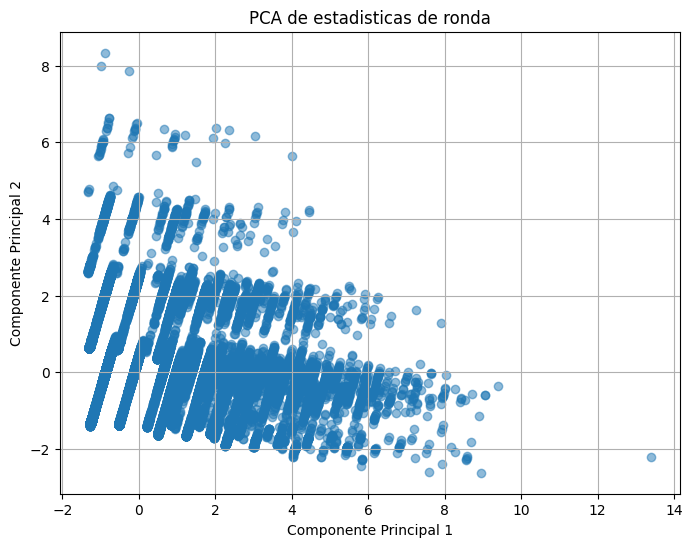

Varianza explicada: [0.38622009 0.21201418]


In [ ]:
# PCA CLASIFICACION

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar y limpiar datos
estadisticas = ['RoundKills', 'RoundHeadshots', 'RoundAssists', 'RoundFlankKills', 'TeamStartingEquipmentValue']
df_modelo = df[estadisticas].dropna()

# Escalar los datos (muy importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_modelo)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5)
plt.title("PCA de estadisticas de ronda")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

# Varianza explicada
print("Varianza explicada:", pca.explained_variance_ratio_)


In [ ]:
print("Valores únicos en dataset:")
print(df.value_counts(dropna=False))

print()
print('--------------')
print()

print("Filas completas con valores raros:")
print(raros)

Valores únicos en dataset:
Unnamed: 0  Map         Team              InternalTeamId  MatchId  RoundId  RoundWinner  MatchWinner  Survived  AbnormalMatch  TimeAlive               TravelledDistance       RLethalGrenadesThrown  RNonLethalGrenadesThrown  PrimaryAssaultRifle  PrimarySniperRifle  PrimaryHeavy  PrimarySMG  PrimaryPistol  FirstKillTime  RoundKills  RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  TeamStartingEquipmentValue  MatchKills  MatchFlankKills  MatchAssists  MatchHeadshots
123779      de_mirage   CounterTerrorist  2               511      5        False        False        True      False          8.004.793.109.418.280   9.867.724.708.696.010   2                      1                         1.0                  0.0                 0.0           0.0         0              438.720.474    4           0             2               0                6100                         27100                       5           1                1           

## Fase 3: Data Preparation

In [ ]:
#ver falta de datos en variables a usar
columnas_armas = ['PrimarySMG', 'PrimaryAssaultRifle', 'PrimaryPistol', 'PrimarySniperRifle', 'PrimaryHeavy']
columnas_modelo = columnas_armas + ['RoundKills']

print("Datos perdidos en las columnas especificadas:")
print(df[columnas_modelo].isnull().sum())

Datos perdidos en las columnas especificadas:
PrimarySMG             0
PrimaryAssaultRifle    0
PrimaryPistol          0
PrimarySniperRifle     0
PrimaryHeavy           0
RoundKills             0
dtype: int64


In [ ]:
print(f"Tamano de database antes de crear el modelo: {len(df)}")

columnas_armas = ['PrimarySMG', 'PrimaryAssaultRifle', 'PrimaryPistol', 'PrimarySniperRifle', 'PrimaryHeavy']
columnas_modelo = columnas_armas + ['RoundKills']

print("Datos faltantes en columnas seleecionadas:")
print(df[columnas_modelo].isnull().sum())

# Filtrar y eliminar filas con valores faltantes
df_modelo = df[columnas_modelo].dropna()
print(f"tamano de df_modelo despues de hacer drop de NaNs: {len(df_modelo)}")

Tamano de database antes de crear el modelo: 79157
Datos faltantes en columnas seleecionadas:
PrimarySMG             0
PrimaryAssaultRifle    0
PrimaryPistol          0
PrimarySniperRifle     0
PrimaryHeavy           0
RoundKills             0
dtype: int64
tamano de df_modelo despues de hacer drop de NaNs: 79157


## Fase 4: Modeling

### Regresión

In [ ]:
# Hipotesis: El numero de kills puede predecirse segun el tipo de arma utilizada.

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Preparacion de datos
columnas_armas = ['PrimarySMG', 'PrimaryAssaultRifle', 'PrimaryPistol', 'PrimarySniperRifle', 'PrimaryHeavy']
df_modelo = df[columnas_armas + ['RoundKills']].dropna()
X = df_modelo[columnas_armas]
y = df_modelo['RoundKills']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Implementacion de modelos
modelos_base = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# 3. Entrenamiento
resultados_base = []
for nombre, modelo in modelos_base.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados_base.append({"Modelo": nombre, "MSE": mse, "R2": r2})

# Mostrar resultados iniciales
print("Resultados sin optimización:")
display(pd.DataFrame(resultados_base).sort_values(by="R2", ascending=False).reset_index(drop=True))

# 4. Optimizacion
resultados_opt = []

# Decision Tree
param_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_dt = GridSearchCV(DecisionTreeRegressor(), param_dt, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_dt.fit(X_train, y_train)
mejor_dt = grid_dt.best_estimator_
y_pred_dt = mejor_dt.predict(X_test)
resultados_opt.append({
    "Modelo": "Decision Tree OPTIMIZADO",
    "MSE": mean_squared_error(y_test, y_pred_dt),
    "R2": r2_score(y_test, y_pred_dt)
})

# Random Forest
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_rf, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)
mejor_rf = grid_rf.best_estimator_
y_pred_rf = mejor_rf.predict(X_test)
resultados_opt.append({
    "Modelo": "Random Forest OPTIMIZADO",
    "MSE": mean_squared_error(y_test, y_pred_rf),
    "R2": r2_score(y_test, y_pred_rf)
})

# 5. Resultados optimizados
print("\nResultados con optimización de hiperparámetros:")
display(pd.DataFrame(resultados_opt).sort_values(by="R2", ascending=False).reset_index(drop=True))


Resultados sin optimización:


,Modelo,MSE,R2
0,Linear Regression,0.758307,0.040458
1,Random Forest,0.775628,0.018541
2,Decision Tree,0.801713,-0.014467


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Resultados con optimización de hiperparámetros:


,Modelo,MSE,R2
0,Random Forest OPTIMIZADO,0.757752,0.041161
1,Decision Tree OPTIMIZADO,0.759882,0.038466


### Clasificación



In [ ]:
# Hipotesis: Clasificacion del uso de rifle de asalto en base a desempeño en la ronda

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Eliminar filas con NaN en columnas relevantes
columnas = ['RoundKills', 'RoundHeadshots', 'RoundAssists', 'RoundFlankKills', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle']
df_modelo = df.dropna(subset=columnas)

# Variables usadas
X = df_modelo[['RoundKills', 'RoundHeadshots', 'RoundAssists', 'RoundFlankKills', 'TeamStartingEquipmentValue']]
y = df_modelo['PrimaryAssaultRifle'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a usar
modelos_clasificacion = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
}

resultados_sin_opt = []
for nombre, modelo in modelos_clasificacion.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    resultados_sin_opt.append({"Modelo": nombre, "Accuracy": accuracy_score(y_test, y_pred)})

print("\nResultados sin optimización:")
display(pd.DataFrame(resultados_sin_opt).sort_values(by="Accuracy", ascending=False).reset_index(drop=True))

resultados_opt = []

#Optimizacion de modelos

# Random Forest
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)
mejor_rf = grid_rf.best_estimator_
y_pred_rf = mejor_rf.predict(X_test)
resultados_opt.append({"Modelo": "Random forest OPTIMIZADO", "Accuracy": accuracy_score(y_test, y_pred_rf)})

# KNN
param_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_knn.fit(X_train, y_train)
mejor_knn = grid_knn.best_estimator_
y_pred_knn = mejor_knn.predict(X_test)
resultados_opt.append({"Modelo": "KNN OPTIMIZADO", "Accuracy": accuracy_score(y_test, y_pred_knn)})

# Logistic Regression
param_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}
grid_logreg = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_logreg, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_logreg.fit(X_train, y_train)
mejor_logreg = grid_logreg.best_estimator_
y_pred_logreg = mejor_logreg.predict(X_test)
resultados_opt.append({"Modelo": "Logistic Regression OPTIMIZADO", "Accuracy": accuracy_score(y_test, y_pred_logreg)})

# Decision Tree
param_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_dt.fit(X_train, y_train)
mejor_dt = grid_dt.best_estimator_
y_pred_dt = mejor_dt.predict(X_test)
resultados_opt.append({"Modelo": "Decision Tree OPTIMIZADO", "Accuracy": accuracy_score(y_test, y_pred_dt)})

print("\nResultados con optimización de hiperparámetros:")
display(pd.DataFrame(resultados_opt).sort_values(by="Accuracy", ascending=False).reset_index(drop=True))



Resultados sin optimización:


,Modelo,Accuracy
0,Logistic Regression,0.831607
1,Random Forest,0.824533
2,Decision Tree,0.818658
3,KNN,0.807858


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Resultados con optimización de hiperparámetros:


,Modelo,Accuracy
0,Random forest OPTIMIZADO,0.837292
1,Decision Tree OPTIMIZADO,0.834765
2,Logistic Regression OPTIMIZADO,0.832870
3,KNN OPTIMIZADO,0.828007


columnas en X_test usadas para la curva ROC:
Index(['RoundKills', 'RoundHeadshots', 'RoundAssists', 'RoundFlankKills',
       'TeamStartingEquipmentValue'],
      dtype='object')


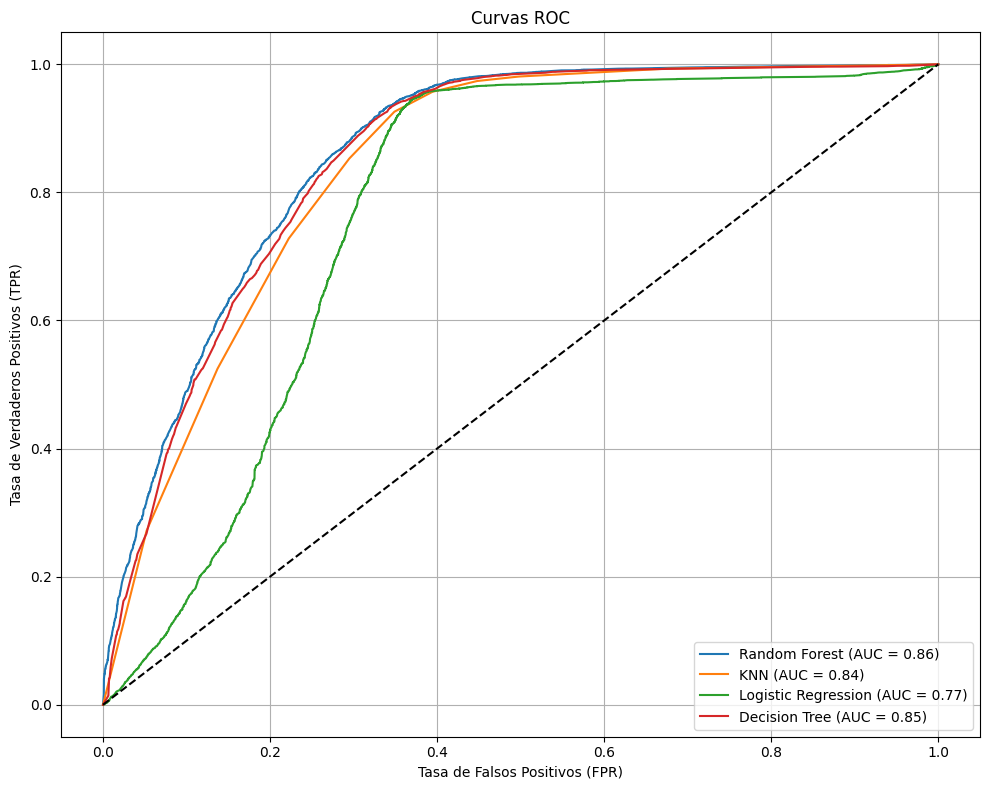

In [ ]:
# ROC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#

# Modelos entrenados
mejores_modelos = {
    "Random Forest": mejor_rf,
    "KNN": mejor_knn,
    "Logistic Regression": mejor_logreg,
    "Decision Tree": mejor_dt
}

# ROC
plt.figure(figsize=(10, 8))
print("columnas en X_test usadas para la curva ROC:")
print(X_test.columns)


for nombre, modelo in mejores_modelos.items():
    if hasattr(modelo, "predict_proba"):
        y_proba = modelo.predict_proba(X_test)[:, 1]
    elif hasattr(modelo, "decision_function"):
        y_proba = modelo.decision_function(X_test)
    else:
        continue

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nombre} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curvas ROC")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Cantidad total de muestras en test:", len(y_test))
print("Cantidad de positivos en test:", sum(y_test))
print("Cantidad de negativos en test:", len(y_test) - sum(y_test))

Cantidad total de muestras en test: 15832
Cantidad de positivos en test: 10185
Cantidad de negativos en test: 5647


## Fase 5: Evaluation


=== Evaluación Clasificación ===

>>> Bosque Aleatorio:
              precision    recall  f1-score   support

           0       0.88      0.63      0.73      5647
           1       0.82      0.95      0.88     10185

    accuracy                           0.84     15832
   macro avg       0.85      0.79      0.81     15832
weighted avg       0.84      0.84      0.83     15832



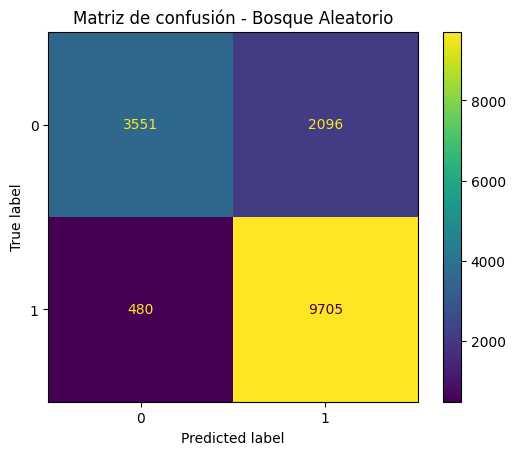


>>> KNN:
              precision    recall  f1-score   support

           0       0.83      0.65      0.73      5647
           1       0.83      0.93      0.87     10185

    accuracy                           0.83     15832
   macro avg       0.83      0.79      0.80     15832
weighted avg       0.83      0.83      0.82     15832



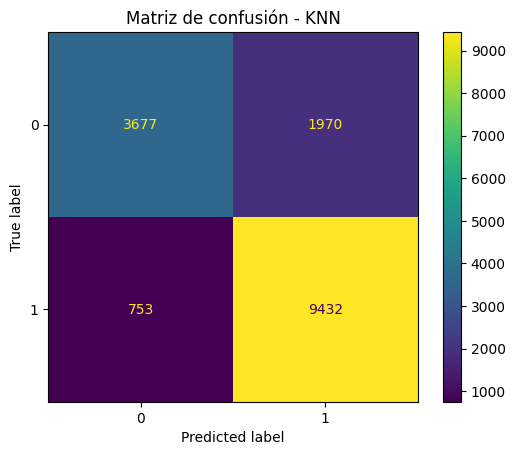


>>> Regresión Logística:
              precision    recall  f1-score   support

           0       0.87      0.62      0.73      5647
           1       0.82      0.95      0.88     10185

    accuracy                           0.83     15832
   macro avg       0.85      0.79      0.80     15832
weighted avg       0.84      0.83      0.83     15832



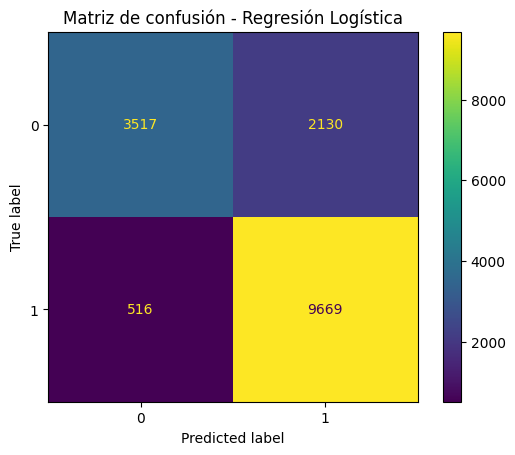


>>> Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      5647
           1       0.82      0.95      0.88     10185

    accuracy                           0.83     15832
   macro avg       0.85      0.79      0.81     15832
weighted avg       0.84      0.83      0.83     15832



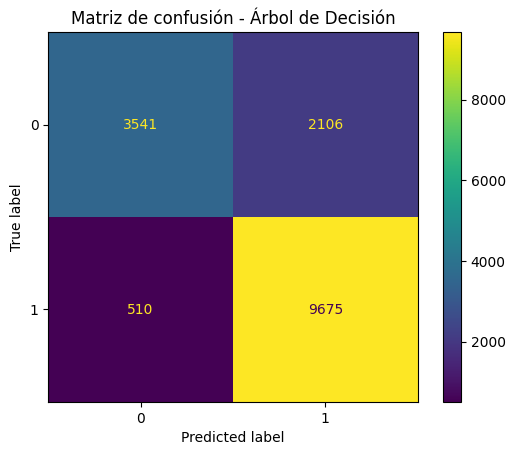

-------------------------------------------------

=== Evaluación Regresión ===

>>> Bosque Aleatorio:
MSE: 0.16 | MAE: 0.16 | R²: 0.29

>>> KNN:
MSE: 0.17 | MAE: 0.17 | R²: 0.25

>>> Regresión Logística:
MSE: 0.17 | MAE: 0.17 | R²: 0.27

>>> Árbol de Decisión:
MSE: 0.17 | MAE: 0.17 | R²: 0.28


In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Evaluar con las métricas que corresponda los mejores modelos, explicar cual es mejor para cada tarea y por qué

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\n=== Evaluación Clasificación ===")
for name, model in mejores_modelos.items():
    print(f"\n>>> {name}:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.title(f"Matriz de confusión - {name}")
    plt.show()

print('-------------------------------------------------')

print("\n=== Evaluación Regresión ===")
for name, model in mejores_modelos.items():
    print(f"\n>>> {name}:")
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.2f} | MAE: {mae:.2f} | R²: {r2:.2f}")

## Fase 5: Deployment

In [ ]:
import joblib
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC



modelos_regresion = {
    "Regresión Lineal": LinearRegression(),
    "Árbol de Decisión": DecisionTreeRegressor(),
    "Bosque Aleatorio": RandomForestRegressor(),
    "SVR": SVR()
}


modelos_clasificacion = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Bosque Aleatorio": RandomForestClassifier(),
    "K-Vecinos Más Cercanos (KNN)": KNeighborsClassifier(),
    "Máquinas de Vectores de Soporte (SVM)": SVC()
}


# Mejor modelo clasificacion
best_class_model_name = 'Bosque Aleatorio'

# Mejor modelo regresion
best_reg_model_name = 'Bosque Aleatorio'



# Guardar mejor modelo de clasificación
best_class_model = modelos_clasificacion[best_class_model_name]
joblib.dump(best_class_model, 'best_classifier.pkl')

# Guardar mejor modelo de regresión
best_reg_model = modelos_regresion[best_reg_model_name]
joblib.dump(best_reg_model, 'best_regressor.pkl')

print(f"Modelos guardados: best_classifier.pkl y best_regressor.pkl")

Modelos guardados: best_classifier.pkl y best_regressor.pkl
